In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


In [155]:
df = pd.read_csv("/Users/aarushinishantsingh/Downloads/diabetes.csv")

In [157]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [159]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [161]:
df.duplicated().sum()

0

In [164]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [166]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [170]:
model = SVC(kernel = "poly",  degree=3, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy :" , acc)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        99
           1       0.72      0.47      0.57        55

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154

Accuracy : 0.7467532467532467


In [172]:
model = SVC(kernel = "rbf", random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy :" , acc)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Accuracy : 0.7337662337662337


In [174]:
model = SVC(kernel = "sigmoid", random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy :" , acc)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        99
           1       0.50      0.53      0.51        55

    accuracy                           0.64       154
   macro avg       0.61      0.62      0.62       154
weighted avg       0.65      0.64      0.64       154

Accuracy : 0.6428571428571429


In [176]:
models = {
    "SVC (Linear)": SVC(kernel="linear",  probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}
results = {}
y_new = {}

In [178]:
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    
    results[name] = {
        "accuracy": acc,
        "f1_score": f,
        "precision": p,
        "recall": r
    }

    y_new[name] = y_pred
    
    

In [180]:
print("Model Metrics:")
print(f"{'Model':20} {'Accuracy':>10} {'F1':>10} {'Precision':>10} {'Recall':>10}")
for name, metrics in results.items():
    print(f"{name:20} {metrics['accuracy']:.3f} {metrics['f1_score']:.3f} {metrics['precision']:.3f} {metrics['recall']:.3f}")

Model Metrics:
Model                  Accuracy         F1  Precision     Recall
SVC (Linear)         0.760 0.661 0.667 0.655
Decision Tree        0.747 0.672 0.625 0.727
KNN                  0.695 0.544 0.583 0.509
Random Forest        0.721 0.613 0.607 0.618
Naive Bayes          0.766 0.684 0.661 0.709


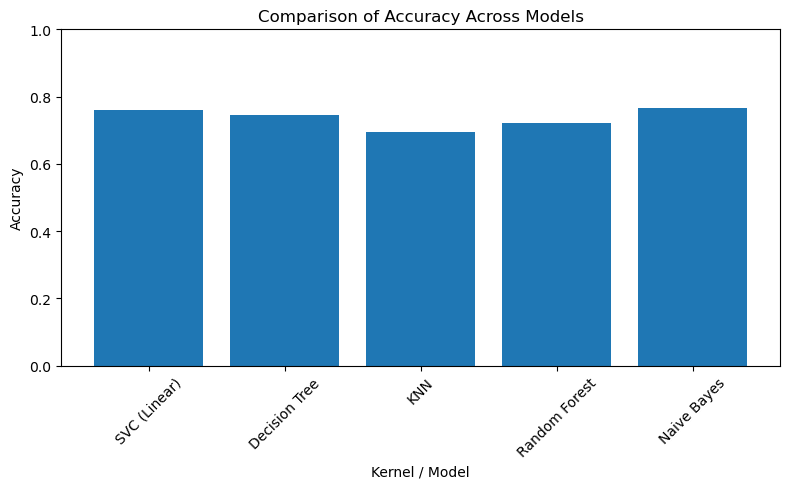

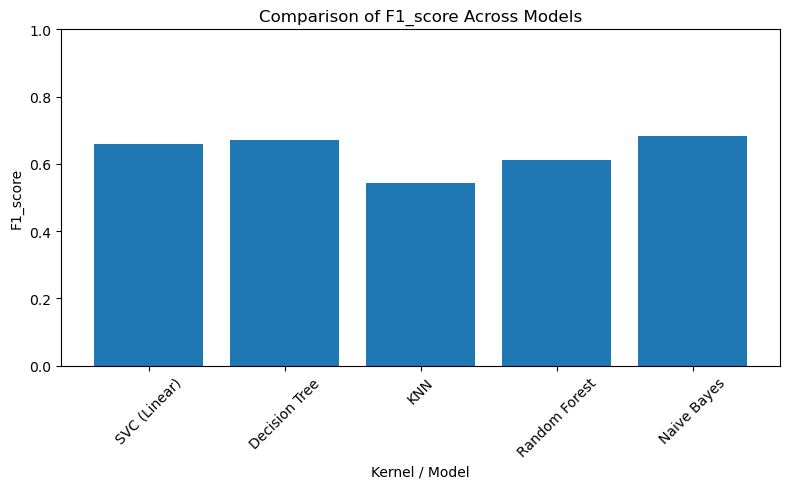

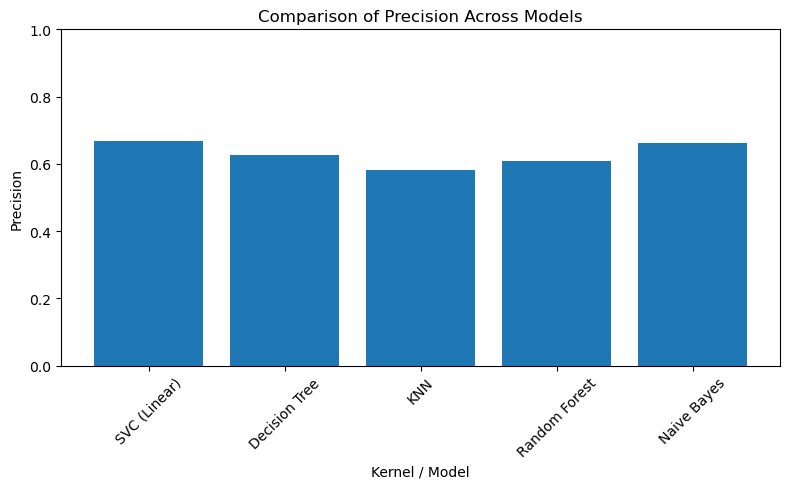

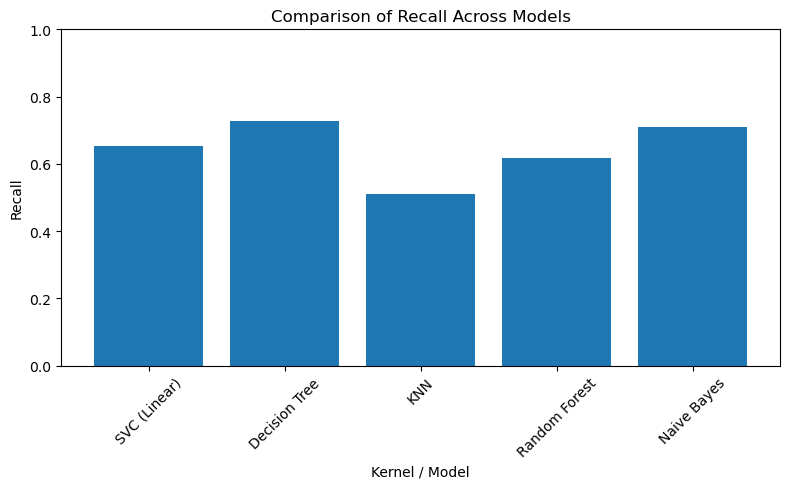

In [182]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
metrics = list(next(iter(results.values())).keys())  

for metric in metrics:
    values = [results[model][metric] for model in model_names]
    
    plt.figure(figsize=(8, 5))
    plt.bar(model_names, values)
    
    plt.title(f"Comparison of {metric.capitalize()} Across Models")
    plt.xlabel("Kernel / Model")
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1) 
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


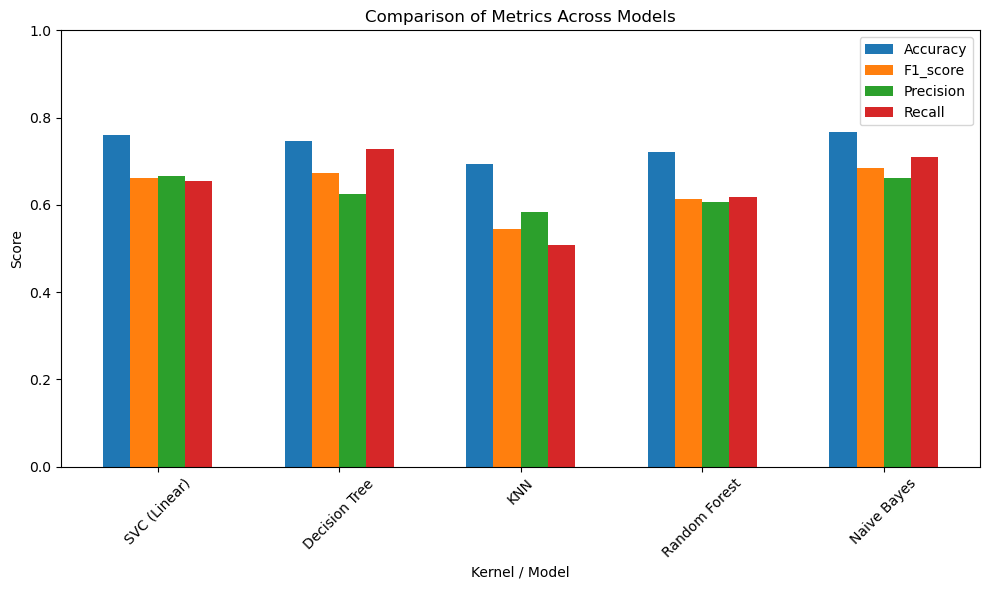

In [184]:
import numpy as np
import matplotlib.pyplot as plt

model_names = list(results.keys())
metrics = list(next(iter(results.values())).keys())

x = np.arange(len(model_names)) 
width = 0.15 

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in model_names]
    plt.bar(x + i * width, values, width=width, label=metric.capitalize())

plt.title("Comparison of Metrics Across Models")
plt.xlabel("Kernel / Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(x + width * (len(metrics) - 1) / 2, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [186]:
results_df = pd.DataFrame(y_new)

In [188]:
results_df.head()


,SVC (Linear),Decision Tree,KNN,Random Forest,Naive Bayes
0,0,1,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,1,0,1


In [222]:
from collections import Counter
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

predictions = []
for name, model in models.items():
    pred = model.predict(X_test)
    predictions.append(pred)

predictions = np.array(predictions)  

df_preds = pd.DataFrame(predictions.T, columns=models.keys())  # rows = samples, columns = model names

df_preds['voting'] = df_preds.apply(lambda row: Counter(row).most_common(1)[0][0], axis=1)

y_pred_voting = df_preds['voting']
accuracy = accuracy_score(y_test, y_pred_voting)
cm = confusion_matrix(y_test, y_pred_voting)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)



Accuracy: 0.7532467532467533
Confusion Matrix:
 [[80 19]
 [19 36]]


In [228]:
df_preds

,SVC (Linear),Decision Tree,KNN,Random Forest,Naive Bayes,voting
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
149,1,1,1,1,1,1
150,0,0,0,0,0,0
151,0,1,0,0,0,0
152,0,0,0,0,1,0


In [224]:
cm = confusion_matrix(y_test, y_pred_voting)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[80 19]
 [19 36]]


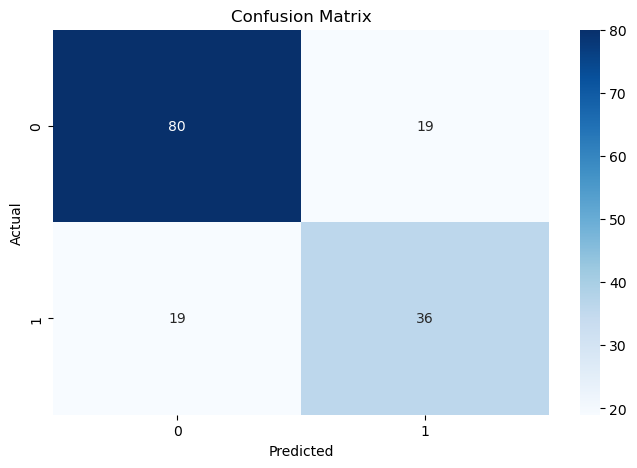

In [226]:
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()